# tp knn par CHERRAD Noura

# knn en utilisant la distance par default euclidienne 

### Importing the necessary libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer

### Load the dataset

In [41]:
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0: malignant, 1: benign)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("\nInfo complète (comme pandas):")
print(df.head())
print('y', y)



Info complète (comme pandas):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimete

### Split the dataset into training and test sets

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Normalizing data

### Standardizing data 

In [43]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
stdScaler.fit(X_train)
standardized_x_train = stdScaler.transform(X_train)
standardized_x_test = stdScaler.transform(X_test)


### KNN Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [63]:
# Instantiate the model with k=3
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(standardized_x_train, y_train)

# Predictions
y_pred = classifier.predict(standardized_x_test)

In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[42  5]
 [ 0 67]]


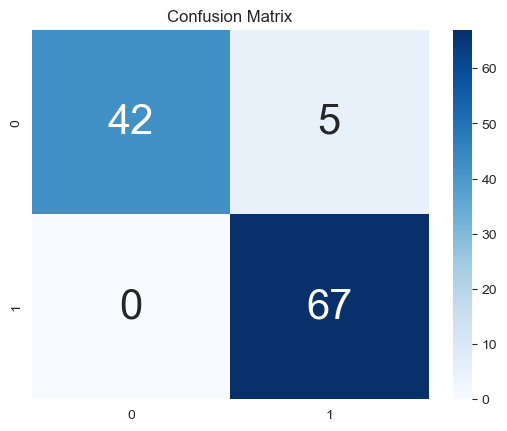

In [65]:
# Plot Confusion Matrix
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

In [66]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")



Accuracy: 0.9561


### Cross-validation for optimal K

In [67]:
k_list = list(range(1, 50, 2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, normalized_x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


### Misclassification Error

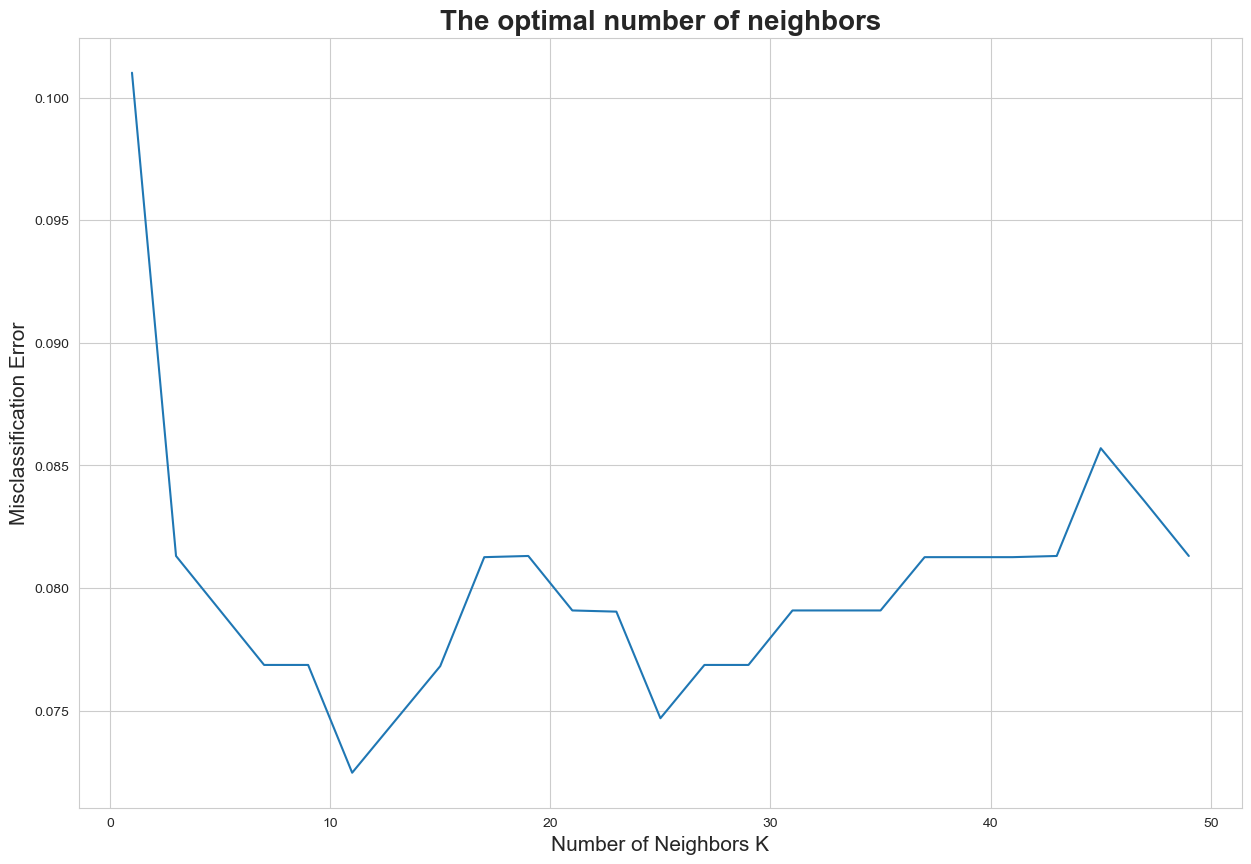

In [68]:
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()


In [69]:
# Best K
best_k = k_list[MSE.index(min(MSE))]
print(f"\nThe optimal number of neighbors is {best_k}.")


The optimal number of neighbors is 11.


# knn en utilisant la distance manhatan

### Importing the necessary libraries

### Load the dataset

In [70]:
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0: malignant, 1: benign)

### Split the dataset into training and test sets

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Normalizing data (standarisation)

In [77]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
stdScaler.fit(X_train)
standardized_x_train = stdScaler.transform(X_train)
standardized_x_test = stdScaler.transform(X_test)


### KNN Classifier with MANHATTAN DISTANCE (L1)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
# Instantiate the model with k=3 and METRIC='MANHATTAN'
classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan') 
classifier.fit(standardized_x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [79]:
# Predictions
y_pred = classifier.predict(standardized_x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[44  3]
 [ 1 66]]


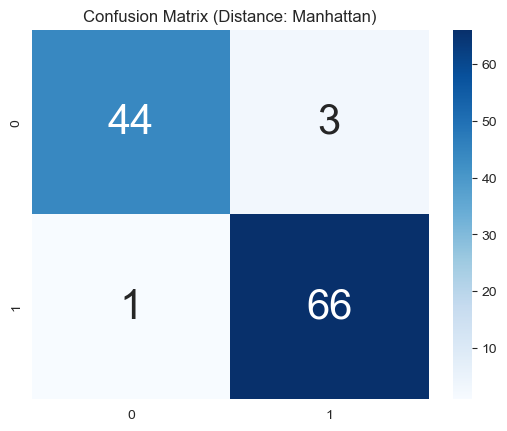

In [80]:
# Plot Confusion Matrix
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix (Distance: Manhattan)')  # <-- Mis à jour
plt.show()

In [81]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.9649


In [82]:
# Cross-validation for optimal K (using Manhattan distance)
k_list = list(range(1, 50, 2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')  # <-- CHANGEMENT ICI
    scores = cross_val_score(knn, normalized_x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

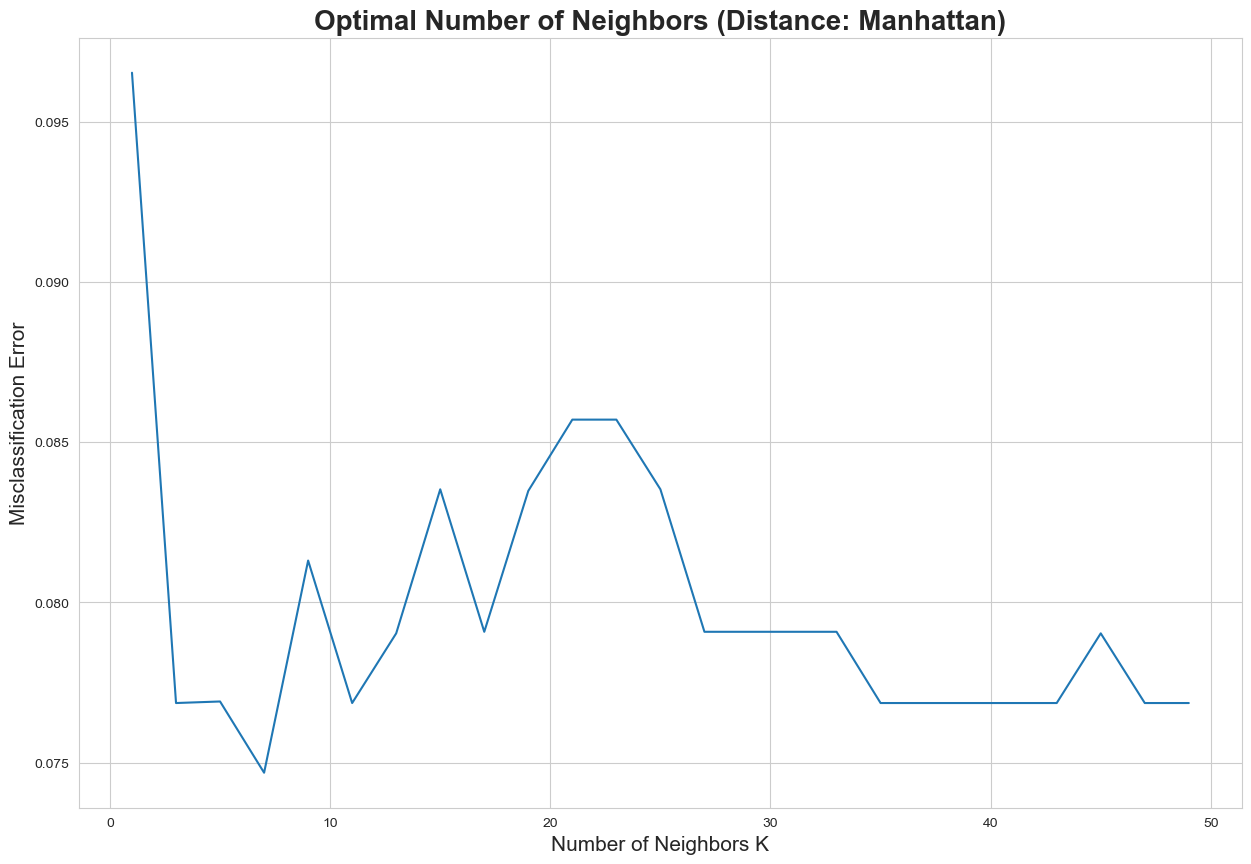

In [84]:
# Misclassification Error
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))
plt.title('Optimal Number of Neighbors (Distance: Manhattan)', fontsize=20, fontweight='bold')  # <-- Mis à jour
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [85]:
# Best K
best_k = k_list[MSE.index(min(MSE))]
print(f"\nThe optimal number of neighbors is {best_k}.")


The optimal number of neighbors is 7.
